# Importing The Libraries


In [ ]:
# Importing the pandas module for data manipulation and analysis
import pandas as pd

# Importing the NumPy module for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, and selecting
import numpy as np

# Importing the pyplot module from Matplotlib for creating a variety of charts and plots
import matplotlib.pyplot as plt

# Import the seaborn library as "sns" for data visualization and statistical analysis
import seaborn as sns

# Import the TensorFlow library as "tf" for convenience
import tensorflow as tf


# Importing the dataset

In [ ]:
dataset = pd.read_csv('Airlines.csv')


# Return the first 5 rows of the dataset

In [ ]:
dataset.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


# Return the last 5 rows of the dataset

In [ ]:
dataset.tail()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1
539382,539383,US,1442,LAX,PHL,5,1439,301,1


# Choosing the top 160,000 rows and loading the dataset.

In [ ]:
dataset = dataset.head(160000)

dataset

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15.0,205.0,1
1,2,US,1558,PHX,CLT,3,15.0,222.0,1
2,3,AA,2400,LAX,DFW,3,20.0,165.0,1
3,4,AA,2466,SFO,DFW,3,20.0,195.0,1
4,5,AS,108,ANC,SEA,3,30.0,202.0,0
...,...,...,...,...,...,...,...,...,...
159995,159996,9E,3949,DTW,MLI,5,540.0,94.0,0
159996,159997,9E,3970,MEM,CMH,5,540.0,106.0,0
159997,159998,9E,3974,DTW,IND,5,540.0,83.0,0
159998,159999,9E,4388,DTW,MSN,5,540.0,87.0,0


# Discovering Data

In [ ]:
# Checking the types of columns
dataset.dtypes


id               int64
Airline         object
Flight           int64
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Time           float64
Length         float64
Delay            int64
dtype: object

In [ ]:
# Showing dataset summary information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           160000 non-null  int64  
 1   Airline      160000 non-null  object 
 2   Flight       160000 non-null  int64  
 3   AirportFrom  160000 non-null  object 
 4   AirportTo    160000 non-null  object 
 5   DayOfWeek    160000 non-null  int64  
 6   Time         159991 non-null  float64
 7   Length       159991 non-null  float64
 8   Delay        160000 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 11.0+ MB


In [ ]:
# Showing number of rows and columns
dataset.shape

(160000, 9)

In [ ]:
# Showing different dataset columns
dataset.columns

Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length', 'Delay'],
      dtype='object')

In [ ]:
# Showing number of null values in each column
dataset.isnull().sum()


id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           9
Length         9
Delay          0
dtype: int64

# Handling missing data

In [ ]:
# Import SimpleImputer
from sklearn.impute import SimpleImputer

# Create imputer object with mean strategy for missing values
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

# Transform data by replacing missing values with mean
dataset[['Time', 'Length']] = imputer.fit_transform(dataset[['Time', 'Length']])

# Exploratory Data Analysis

### Flight Delay Distribution by Airline




<Axes: xlabel='Airline', ylabel='count'>

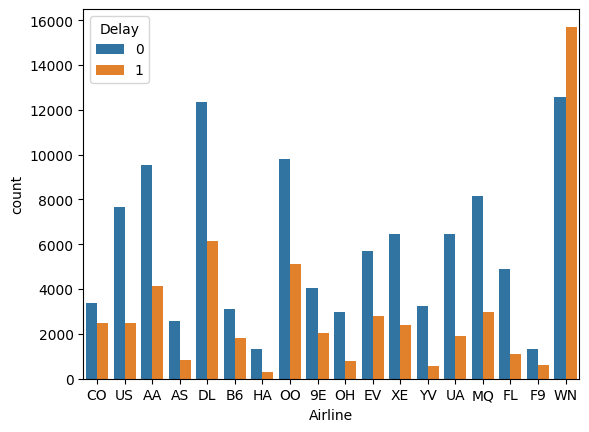

In [ ]:
# Show the count of flights categorized as delayed or not delayed by each airline.
sns.countplot(data=dataset, x='Airline', hue='Delay')

### Flight Lengths by Airline


<Axes: xlabel='Airline', ylabel='Length'>

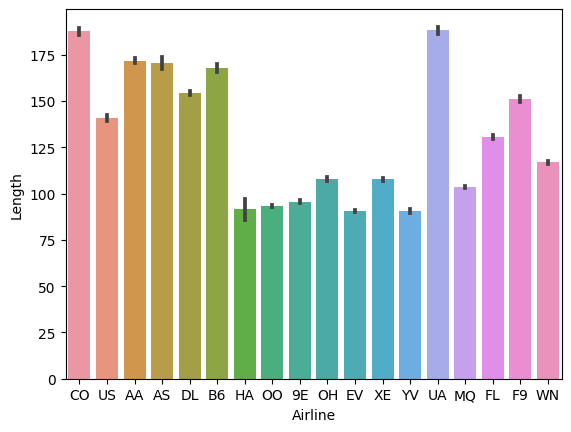

In [ ]:
# The average flight length varies among airlines
sns.barplot(data=dataset, x='Airline', y='Length')


### Flight Frequency by Day of the Week



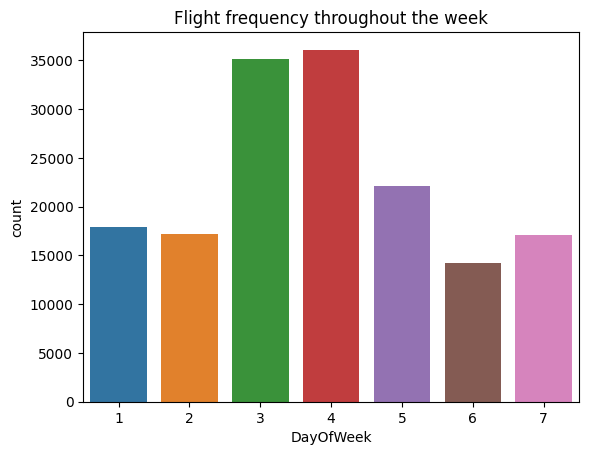

In [ ]:
#Flight frequency throughout the week
DayOfWeekOrder = list(range(1,8))
sns.countplot(x='DayOfWeek',data=dataset,order=DayOfWeekOrder).set(title='Flight frequency throughout the week');

### Flight Delay Proportion by Day of the Week



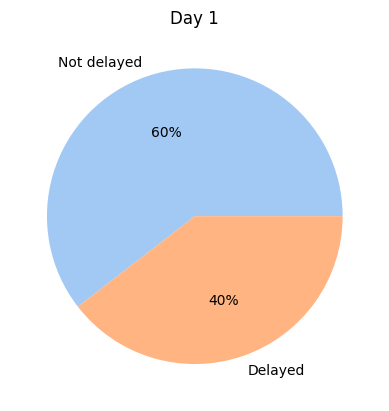

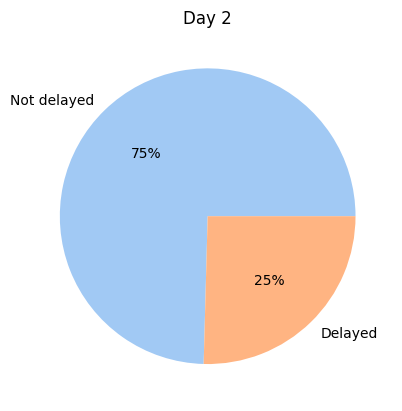

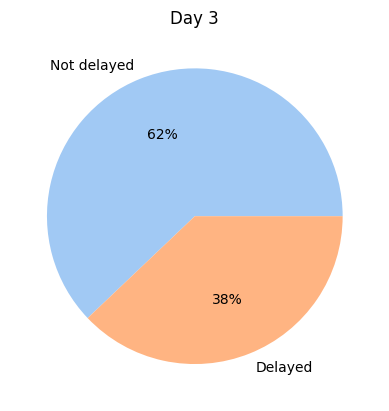

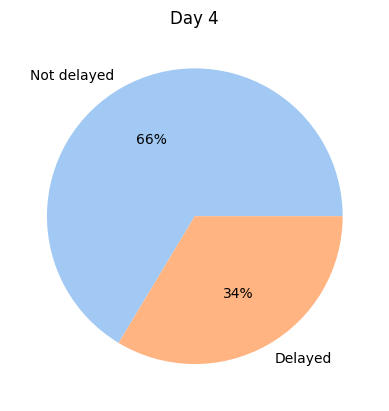

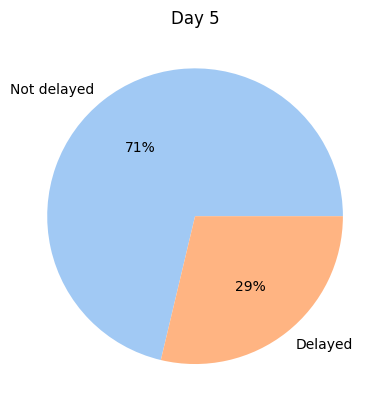

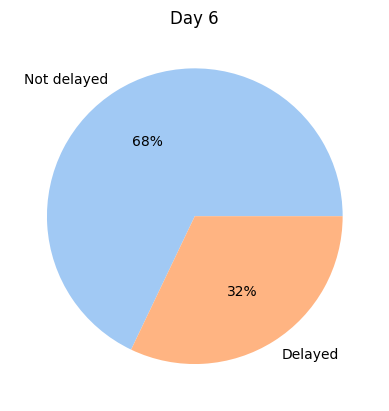

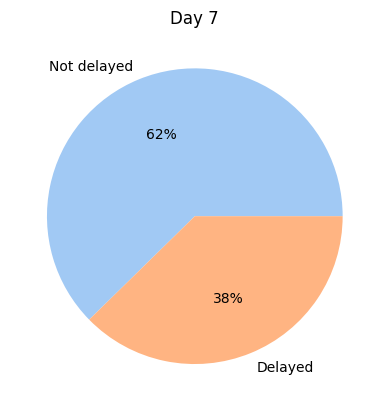

In [ ]:
#Day of week vs Flight being delayed
a = dataset.groupby(['DayOfWeek','Delay']).count().unstack('Delay')['Time']
for i in range(a.shape[0]):
    numOfFlights = a.iloc[i,0]+a.iloc[i,1]
    for j in [0,1]:
        a.iloc[i,j] = a.iloc[i,j]/numOfFlights

#set labels for pie chart
pieChartLabels = ['Not delayed','Delayed']
#define Seaborn color palette to use
myColors = sns.color_palette('pastel')[0:5]
#display pie charts for the whole week
for i in range(1,8):
    b = a.iloc[i-1,:]
    #create pie chart
    plt.pie(b, labels = pieChartLabels, colors = myColors, autopct='%.0f%%')
    plt.title('Day ' + str(i))
    plt.show()

### Airlines with the Most Delayed Flights



<ipython-input-17-e7576cadda7d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  c = dataset.groupby('Airline').sum()['Delay'].sort_values(ascending=False)


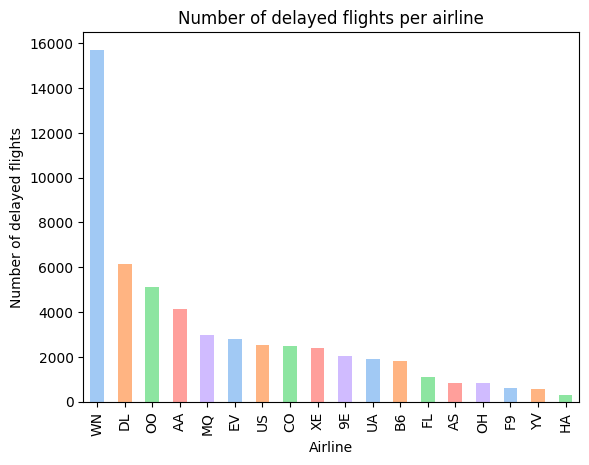

In [ ]:
#We will now look at which airlines had the most delayed flights
c = dataset.groupby('Airline').sum()['Delay'].sort_values(ascending=False)
c.plot(kind='bar',color=myColors)
plt.ylabel('Number of delayed flights')
plt.title('Number of delayed flights per airline')
plt.show()

# Checking for imbalance

In [ ]:
# Separate features (independent variables) and target variable (dependent variable)
x_check = dataset.drop(['Delay'], axis=1)
y_check = dataset['Delay']

In [ ]:
# Count the occurrences of each unique value in the target variable
y_check.value_counts()

0    105672
1     54328
Name: Delay, dtype: int64

<Axes: ylabel='Delay'>

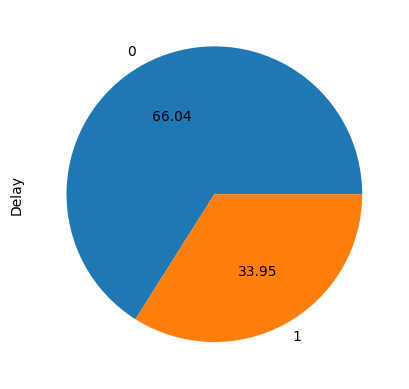

In [ ]:
# Visualize the distribution of the target variable as a pie chart
y_check.value_counts().plot.pie(autopct='%0.2f')


# Undersampling

In [ ]:
# Import RandomUnderSampler from imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler

# Define sampling strategy
rus = RandomUnderSampler(sampling_strategy=1)

# Apply under-sampling
x_res, y_res = rus.fit_resample(x_check, y_check)


In [ ]:
# Check the distribution of the target variable after under-sampling
y_res.value_counts()

0    54328
1    54328
Name: Delay, dtype: int64

<Axes: ylabel='Delay'>

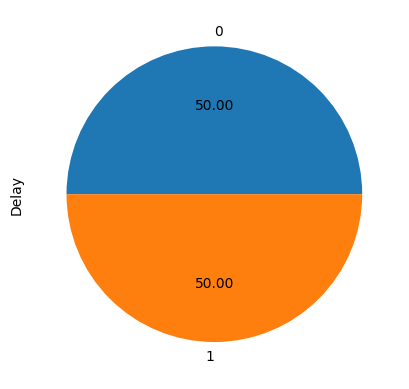

In [ ]:
# Visualize the distribution of the target variable as a pie chart after under sampling
y_res.value_counts().plot.pie(autopct = '%0.2f')

# Extracting the independent variables (input variables) and dependent variables (output variables)

In [ ]:
# Extracting the independent variables from the dataset, excluding the first and last columns
x = dataset.iloc[:, :-1].values

# Extracting the dependent variable from the last column of the dataset
y = dataset.iloc[:, -1].values

In [ ]:
print(x)

[[1 'CO' 269 ... 3 15.0 205.0]
 [2 'US' 1558 ... 3 15.0 222.0]
 [3 'AA' 2400 ... 3 20.0 165.0]
 ...
 [159998 '9E' 3974 ... 5 540.0 83.0]
 [159999 '9E' 4388 ... 5 540.0 87.0]
 [160000 'AA' 1394 ... 5 540.0 155.0]]


In [ ]:
print(y)

[1 1 1 ... 0 0 0]


# Splitting the dataset into the Training set and Test set

In [ ]:
# Import the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# x: Input data features
# y: Target labels
# test_size: Proportion of data for testing (0.2 means 20%)
# random_state: Random seed for shuffling (0 for reproducibility)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
print(x_train)

[[85961 'F9' 496 ... 1 375.0 202.0]
 [62558 'WN' 1800 ... 6 855.0 145.0]
 [78621 'MQ' 2905 ... 7 930.0 70.0]
 ...
 [152316 'AS' 755 ... 4 1080.0 268.0]
 [117953 'FL' 917 ... 2 1139.0 124.0]
 [43568 'OO' 6426 ... 5 737.0 49.0]]


In [ ]:
print(x_test)

[[100597 'FL' 185 ... 1 1139.0 131.0]
 [92146 'AA' 2344 ... 1 690.0 135.0]
 [5653 'WN' 3505 ... 3 630.0 90.0]
 ...
 [5425 'MQ' 3225 ... 3 620.0 130.0]
 [29669 'XE' 2346 ... 4 960.0 101.0]
 [15405 'OH' 6536 ... 3 1155.0 119.0]]


In [ ]:
print(y_train)

[0 1 0 ... 0 0 0]


In [ ]:
print(y_test)

[1 1 1 ... 0 0 0]


# Encoding categorical data

### Encoding the Independent Variable


In [ ]:
# Import the LabelEncoder and ColumnTransformer from sklearn.preprocessing and sklearn.compose
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

# Assuming x_train and x_test are your input datasets

# Specify the columns to be label encoded - In this case, columns 0, 2, and 3
columns_to_encode = [1, 3, 4]

# Create a ColumnTransformer object with a LabelEncoder for specified columns and a passthrough for other columns
ct_obj = ColumnTransformer(
    transformers=[("encoder", "passthrough", columns_to_encode)],
    remainder="passthrough"
)

# Apply the ColumnTransformer to the training set and transform the specified columns using LabelEncoder
for col in columns_to_encode:
    le = LabelEncoder()
    x_train[:, col] = le.fit_transform(x_train[:, col])

# Apply the ColumnTransformer to the testing set and transform the specified columns using the same LabelEncoder
for col in columns_to_encode:
    le = LabelEncoder()
    x_test[:, col] = le.fit_transform(x_test[:, col])


In [ ]:
print(x_train)

[[85961 7 496 ... 1 375.0 202.0]
 [62558 15 1800 ... 6 855.0 145.0]
 [78621 10 2905 ... 7 930.0 70.0]
 ...
 [152316 2 755 ... 4 1080.0 268.0]
 [117953 8 917 ... 2 1139.0 124.0]
 [43568 12 6426 ... 5 737.0 49.0]]


In [ ]:
print(x_test)

[[100597 8 185 ... 1 1139.0 131.0]
 [92146 1 2344 ... 1 690.0 135.0]
 [5653 15 3505 ... 3 630.0 90.0]
 ...
 [5425 10 3225 ... 3 620.0 130.0]
 [29669 16 2346 ... 4 960.0 101.0]
 [15405 11 6536 ... 3 1155.0 119.0]]


# Feature Scaling

In [ ]:
# Import the StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
sc = StandardScaler()

# Apply the StandardScaler to the training set, centering and scaling the features to a mean of 0 and a variance of 1
x_train = sc.fit_transform(x_train)

# Apply the StandardScaler to the testing set using the same parameters learned from the training set
x_test = sc.transform(x_test)

In [ ]:
print(x_train)

[[ 0.13067535 -0.44275638 -0.93535148 ... -1.6293897  -1.50339576
   1.03671141]
 [-0.37604638  1.06950675 -0.3071515  ...  1.21011856  0.21854384
   0.21189658]
 [-0.02825032  0.12434229  0.22518054 ...  1.77802021  0.4875969
  -0.87338609]
 ...
 [ 1.56739372 -1.38792084 -0.81057864 ...  0.07431526  1.02570303
   1.99176016]
 [ 0.82336609 -0.25372349 -0.73253539 ... -1.06148805  1.23735811
  -0.09198257]
 [-0.78721784  0.50240807  1.92141683 ...  0.64221691 -0.20476631
  -1.17726524]]


In [ ]:
print(x_test)

[[ 0.447574   -0.25372349 -1.08517525 ... -1.6293897   1.23735811
   0.00931048]
 [ 0.26459296 -1.57695373 -0.04508035 ... -1.6293897  -0.3733729
   0.06719222]
 [-1.60815337  1.06950675  0.51422961 ... -0.4935864  -0.58861535
  -0.58397738]
 ...
 [-1.61309002  0.12434229  0.37934004 ... -0.4935864  -0.62448909
  -0.00515995]
 [-1.08815897  1.25853964 -0.04411685 ...  0.07431526  0.59521813
  -0.42480259]
 [-1.39700308  0.31337518  1.97440916 ... -0.4935864   1.29475609
  -0.16433475]]


# Creating the Artificial Neural Netowrk (ANN) model


In [ ]:
ann_model=tf.keras.models.Sequential()


In [ ]:
ann_model.add(tf.keras.layers.Dense(units=16,activation="relu"))

In [ ]:
ann_model.add(tf.keras.layers.Dense(units=8,activation="relu"))

In [ ]:
ann_model.add(tf.keras.layers.Dense(units= 1, activation='sigmoid'))

# Compile the model

In [ ]:
ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fit the Model to the taining set

In [ ]:
history = ann_model.fit(x_train, y_train, batch_size = 25, epochs = 80)

Epoch 1/80
5120/5120 [==============================] - 11s 2ms/step - loss: 0.6223 - accuracy: 0.6625
Epoch 2/80
5120/5120 [==============================] - 9s 2ms/step - loss: 0.6144 - accuracy: 0.6693
Epoch 3/80
5120/5120 [==============================] - 10s 2ms/step - loss: 0.6122 - accuracy: 0.6715
Epoch 4/80
5120/5120 [==============================] - 10s 2ms/step - loss: 0.6106 - accuracy: 0.6718
Epoch 5/80
5120/5120 [==============================] - 11s 2ms/step - loss: 0.6095 - accuracy: 0.6735
Epoch 6/80
5120/5120 [==============================] - 9s 2ms/step - loss: 0.6074 - accuracy: 0.6757
Epoch 7/80
5120/5120 [==============================] - 10s 2ms/step - loss: 0.6048 - accuracy: 0.6796
Epoch 8/80
5120/5120 [==============================] - 10s 2ms/step - loss: 0.6022 - accuracy: 0.6836
Epoch 9/80
5120/5120 [==============================] - 9s 2ms/step - loss: 0.6004 - accuracy: 0.6851
Epoch 10/80
5120/5120 [==============================] - 10s 2ms/step - loss

# Predicting the test set results

In [ ]:
y_pred = ann_model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

1000/1000 [==============================] - 1s 1ms/step
[[0.39229852 1.        ]
 [0.39532599 1.        ]
 [0.59152883 1.        ]
 ...
 [0.37576887 0.        ]
 [0.23462921 0.        ]
 [0.35326505 0.        ]]


In [ ]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


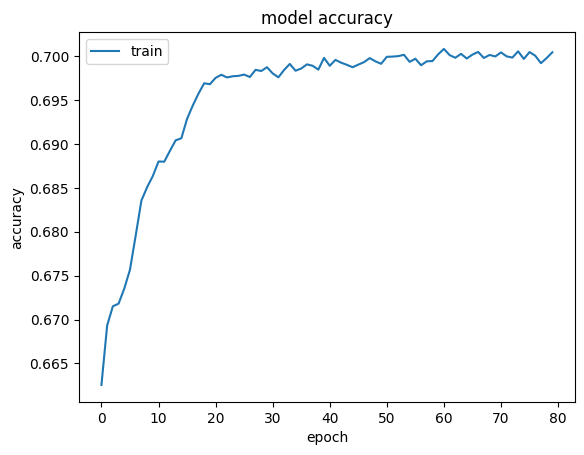

In [ ]:
#Visualizing history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

plt.show()

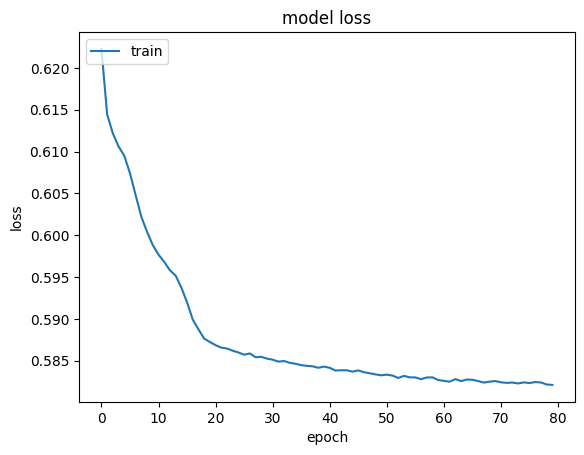

In [ ]:
# Visualizing history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.1993729708323981